# 신경망 모델 훈련

**[핵심키워드]** 손실곡선, 드롭아웃(dropout), 콜백(callback), 조기종료  

- 인공신경망 모델을 훈련하는 모범 사례와 필요한 도구 학습

- 모델링 순서
1. 데이터 준비 (학습 / 테스트) -> 전처리(tensor형태로 벡터화) + 정규화 + 원핫레코딩
    - 학습 : 평가용으로도 나누기도 한다
    - 교차검증
2. 모델생성
3. 컴파일
4. fit
5. evaluate

### 데이터 준비

In [50]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
from tensorflow.keras.datasets import fashion_mnist

In [52]:
# fashion mnist datasets loading

(train_input , train_target) , (test_input , test_target) = fashion_mnist.load_data()

train_scaled = train_input/255.0

train_X , val_X , train_y , val_y = train_test_split(train_scaled, train_target , test_size=0.2 , random_state=42)

### 모델 생성 함수 정의

: 함수의 a_layer 매개변수는 케라스 층으로서, 은닉층 뒤에 층을 추가하는 함수

In [54]:
from tensorflow.keras import models
from tensorflow.keras import layers

def model_fn(a_layer=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # Flatten : 2차원을 1차원으로 변경
    model.add(layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(layers.Dense(10, activation='softmax'))
    return model

### 모델 생성하고 모델의 정보 출력

In [55]:
model = model_fn()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 훈련
: 훈련된 모델 객체를 변수 history에 저장  

In [57]:
# 기본 RMSprop 옵티마이저로 모델 학습
model.compile(loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

# hist = model.fit(train_scaled , train_target, epochs=5, verbose=0)

hist = model.fit(train_X , train_y, epochs=5, verbose=0) # 1번째로는 scaled된거 2번째는 기존 훈련 데이터 사용

- history 객체는 딕셔너리 형식으로 훈련 측정값이 저장되어 있음
    - loss와 accuracy : 에포크마다 계산한 값이 순서대로 리스트에 저장

In [58]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

## 손실 곡선

### history 속성에 포함된 손실(loss)과 정확도(accuracy) 시각화

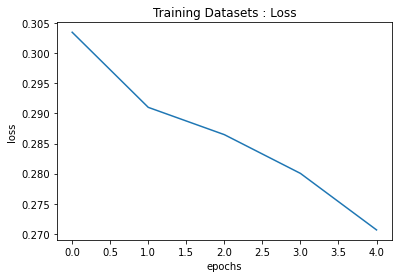

In [59]:
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Datasets : Loss')
plt.savefig('DL1' , dpi = 300)
plt.show()

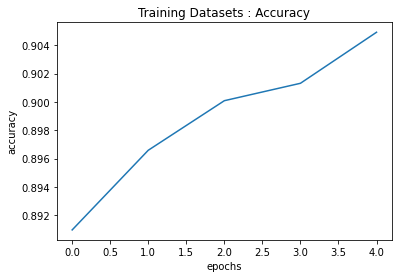

In [60]:

plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Datasets : Accuracy')
plt.savefig('DL2' , dpi = 300)
plt.show()

### epochs=20 인 경우 모델 훈련 후 loss 값 시각화

In [63]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

# hist2 = model.fit(train_scaled, train_target, epochs=20, verbose=0)

hist2 = model.fit(train_X, train_y, epochs=20, verbose=0) # verbose는 학습되는 상황에 대해서 보여줌

#### [문제1] epochs=20으로 학습한 경우 accuracy 값을 그래프로 그려보시오

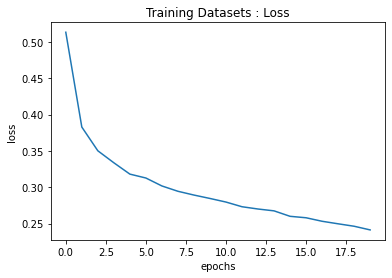

In [23]:
plt.plot(hist2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Datasets : Loss')
plt.savefig('DL3' , dpi = 300)
plt.show()

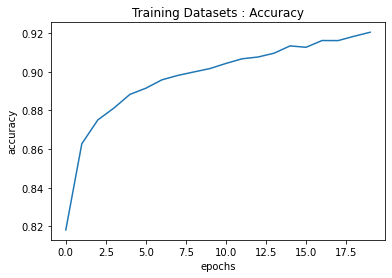

In [24]:
plt.plot(hist2.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Datasets : Accuracy')
plt.savefig('DL4' , dpi = 300)
plt.show()

## 검증 손실

- 에포크에 따라 과대적합과 과소적합이 달라짐
- 인공신경망 모델이 최적화하는 대상을 정확도가 아니라 손실함수
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
    - 모델이 잘 훈련되었는지 판단하기 위해서는 정확도보다는 손실함수의 값을 확인

#### 에포크마다 검증 손실 계산
- fit() 메서드의 **validation_data** 매개변수에 검증 데이터를 전달
- 검증할 입력과 타깃값은 튜플로 전달

In [25]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

hist3 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

# validation에 대한 loss도 같이 진행

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5344 - accuracy: 0.8124 - val_loss: 0.4737 - val_accuracy: 0.8323
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3933 - accuracy: 0.8578 - val_loss: 0.3724 - val_accuracy: 0.8682
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3549 - accuracy: 0.8728 - val_loss: 0.3643 - val_accuracy: 0.8695
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3336 - accuracy: 0.8802 - val_loss: 0.3751 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3190 - accuracy: 0.8871 - val_loss: 0.3882 - val_accuracy: 0.8665
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3064 - accuracy: 0.8910 - val_loss: 0.3923 - val_accuracy: 0.8731
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8935 - val_loss: 0.3549 - val_accuracy:

#### 검증데이터에 대한 손실과 정확도는 val_loss, val_accuracy에 저장

In [64]:
hist3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [65]:
hist3.params['epochs']

20

In [67]:
hist3.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

#### 훈련데이터와 검증데이터에 대한 손실과 정확도 시각화

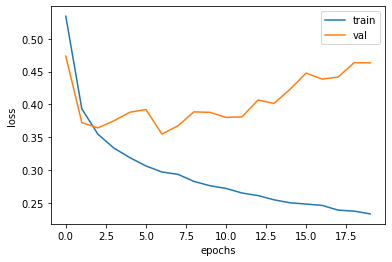

In [68]:


plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

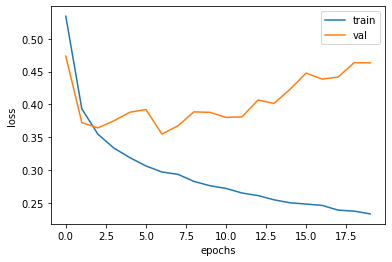

In [69]:
# 그냥 x축에 epoch 넣기

plt.plot(hist3.epoch , hist3.history['loss'])
plt.plot(hist3.epoch , hist3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

#### Adam 옵티마이저를 이용한 모델의 훈련 손실과 검증 손실

In [28]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

# sparse-categorical_crossentropy : y값이 멀티 값으로 설정되어 있어서

hist4 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.8159 - val_loss: 0.4257 - val_accuracy: 0.8468
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3951 - accuracy: 0.8589 - val_loss: 0.4216 - val_accuracy: 0.8518
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3570 - accuracy: 0.8709 - val_loss: 0.3721 - val_accuracy: 0.8658
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3280 - accuracy: 0.8799 - val_loss: 0.3512 - val_accuracy: 0.8748
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3079 - accuracy: 0.8880 - val_loss: 0.3628 - val_accuracy: 0.8698
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2939 - accuracy: 0.8911 - val_loss: 0.3239 - val_accuracy: 0.8846
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2782 - accuracy: 0.8982 - val_loss: 0.3618 - val_accuracy:

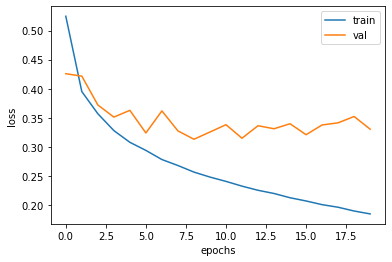

In [29]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

#### [문제2] 앞의 신경망 모델에 대하여 학습률을 조정하여 변화되는 손실 곡선을 그려보시오.

---

## 드롭아웃(dropout)

: 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey  Hinton)이 소개한 개념
- 은닉층에서 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
- 훈련 중에 적용되며 평가나 예측에서는 적용되지 않음
- 텐서플로는 이를 자동으로 처리

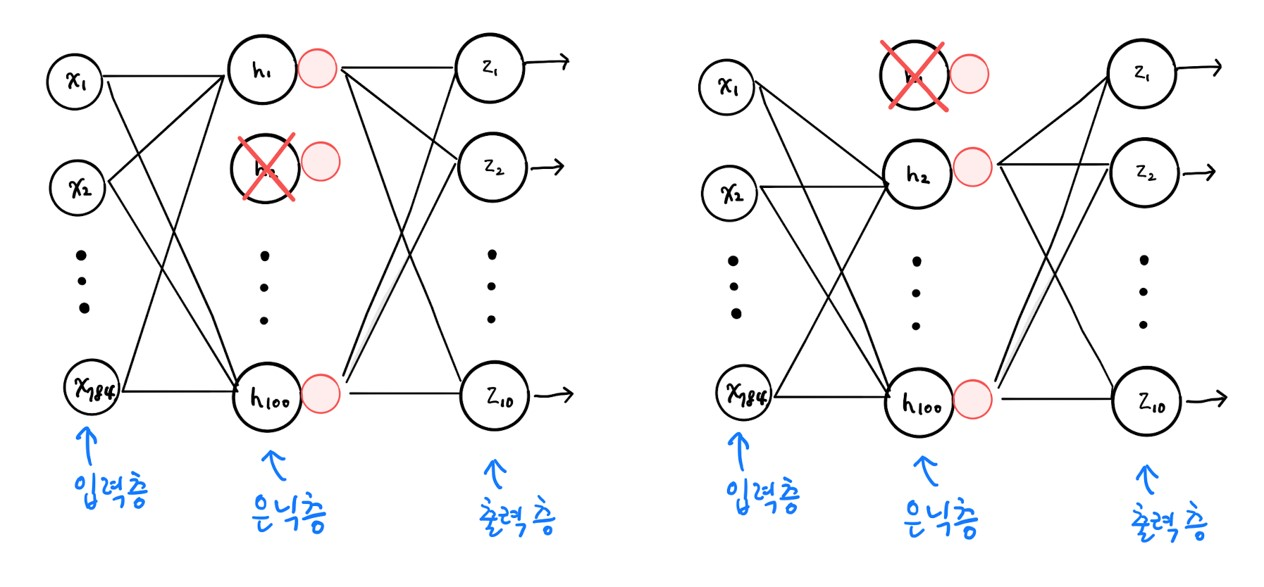

#### 드롭아웃이 과대적합을 막는 이유?

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함 

#### Dropout 클래스

- keras.layres 패키지 아래 제공
    - keras.layers.Dropout(드롭아웃비율)  
    - 드롭아웃하지 않는 뉴런의 출력은 $1/(1-r)$ 만큼 증가시켜 출력의 총합이 같도록 만듬

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬

In [31]:
# 30% 정도 드롭아웃

model = model_fn(layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


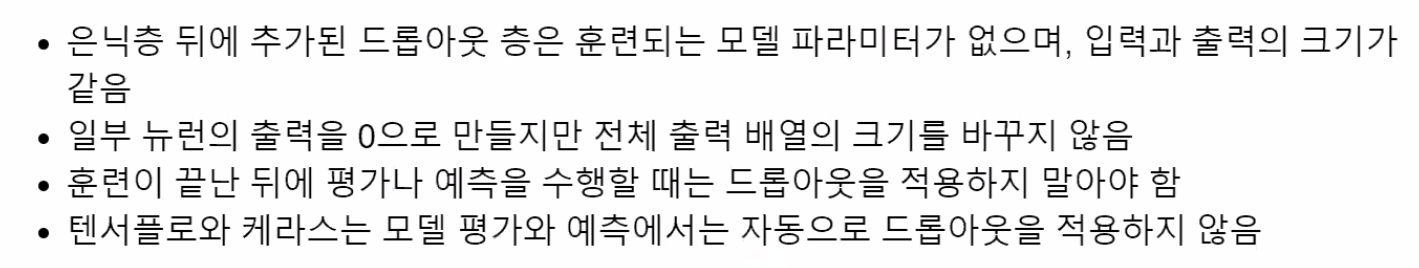

#### 드롭아웃이 적용된 모델의 훈련 손실과 검증 손실 그래프

In [32]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

hist5 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5929 - accuracy: 0.7896 - val_loss: 0.4352 - val_accuracy: 0.8461
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4392 - accuracy: 0.8419 - val_loss: 0.3851 - val_accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4030 - accuracy: 0.8536 - val_loss: 0.3699 - val_accuracy: 0.8623
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3843 - accuracy: 0.8604 - val_loss: 0.3572 - val_accuracy: 0.8699
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8663 - val_loss: 0.3567 - val_accuracy: 0.8712
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.8710 - val_loss: 0.3385 - val_accuracy: 0.8776
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8721 - val_loss: 0.3463 - val_accuracy:

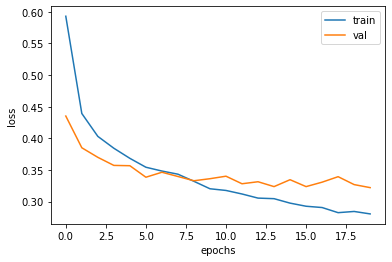

In [34]:
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

# 10번째 값이 가장 적정한 수라고 설정

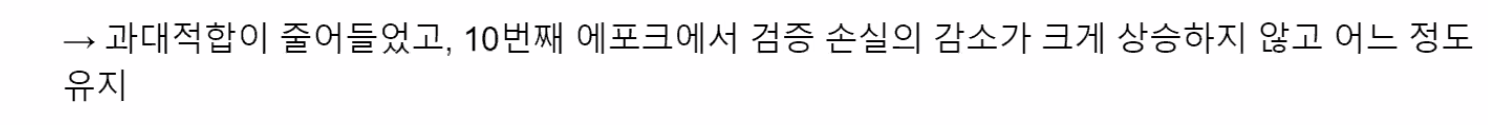

## 모델 저장과 복원

#### 에포크 횟수를 10으로 지정하고 모델을 훈련

In [36]:

model = model_fn(layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

hist6 = model.fit(train_X, train_y, epochs=10, validation_data=(val_X, val_y))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5806 - accuracy: 0.7963 - val_loss: 0.4379 - val_accuracy: 0.8375
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4357 - accuracy: 0.8419 - val_loss: 0.3891 - val_accuracy: 0.8535
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8549 - val_loss: 0.3741 - val_accuracy: 0.8653
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8625 - val_loss: 0.3692 - val_accuracy: 0.8641
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3642 - accuracy: 0.8647 - val_loss: 0.3585 - val_accuracy: 0.8690
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8701 - val_loss: 0.3352 - val_accuracy: 0.8763
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3399 - accuracy: 0.8744 - val_loss: 0.3351 - val_accuracy:

#### 훈련된 모델의 파라미터를 저장 : save_weights() 메서드  
- 텐서플로의 체크포인트 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [37]:
model.save_weights('./model/model-weights.h5')

#### 훈련된 모델 구조와 파라미터를 함께 저장 : model.save() 메서드   

- 텐서플로의 SavedModel 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [38]:
model.save('./model/model-whole.h5')

#### 저장된 파일들 확인

In [39]:
%cd model
%ls *.h5
%cd ..

C:\PythonStudy\DL\model
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EC09-A5E2

 C:\PythonStudy\DL\model 디렉터리

2022-03-22  오전 11:51           333,448 model-weights.h5
2022-03-22  오전 11:52           982,704 model-whole.h5
               2개 파일           1,316,152 바이트
               0개 디렉터리  300,311,728,128 바이트 남음
C:\PythonStudy\DL


#### 새로운 모델에 저장된 훈련모델 가중치를 적용하여 훈련

- load_weights(모델파라미터저장파일명) 메서드

- save_weights()로 저장된 모델과 정확히 같은 구조를 가져야 함

In [40]:
model = model_fn(layers.Dropout(0.3))
model.load_weights('./model/model-weights.h5')

#### 모델의 검증 정확도 확인

In [42]:
predicts = model.predict(val_X)
predicts

array([[2.7125135e-09, 9.9213975e-16, 4.5799843e-11, ..., 1.6501167e-08,
        9.9995935e-01, 7.2005010e-12],
       [5.0044298e-07, 1.9516067e-09, 1.0515696e-07, ..., 3.9605872e-08,
        9.9999833e-01, 2.0031200e-08],
       [6.0556738e-12, 9.0249280e-11, 2.8584550e-14, ..., 9.9965978e-01,
        1.2948423e-09, 5.4335756e-06],
       ...,
       [2.7692467e-05, 3.0356639e-09, 2.5216923e-07, ..., 7.6074798e-06,
        9.9992299e-01, 8.3111863e-06],
       [8.7003613e-08, 4.7885462e-16, 2.3598652e-08, ..., 3.7074904e-10,
        9.9999654e-01, 3.2951239e-12],
       [3.9050609e-01, 1.7834906e-05, 4.0989548e-02, ..., 1.0024632e-02,
        8.1524637e-04, 4.2615049e-02]], dtype=float32)

In [43]:
predicts.shape

(12000, 10)

In [47]:
val_pred = np.argmax(predicts , axis=1) # 열방향으로 가장 최대값의 인덱스를 가져옴

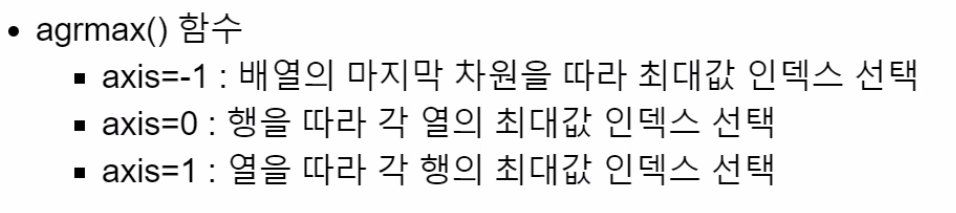

- argmax임 -> 오타

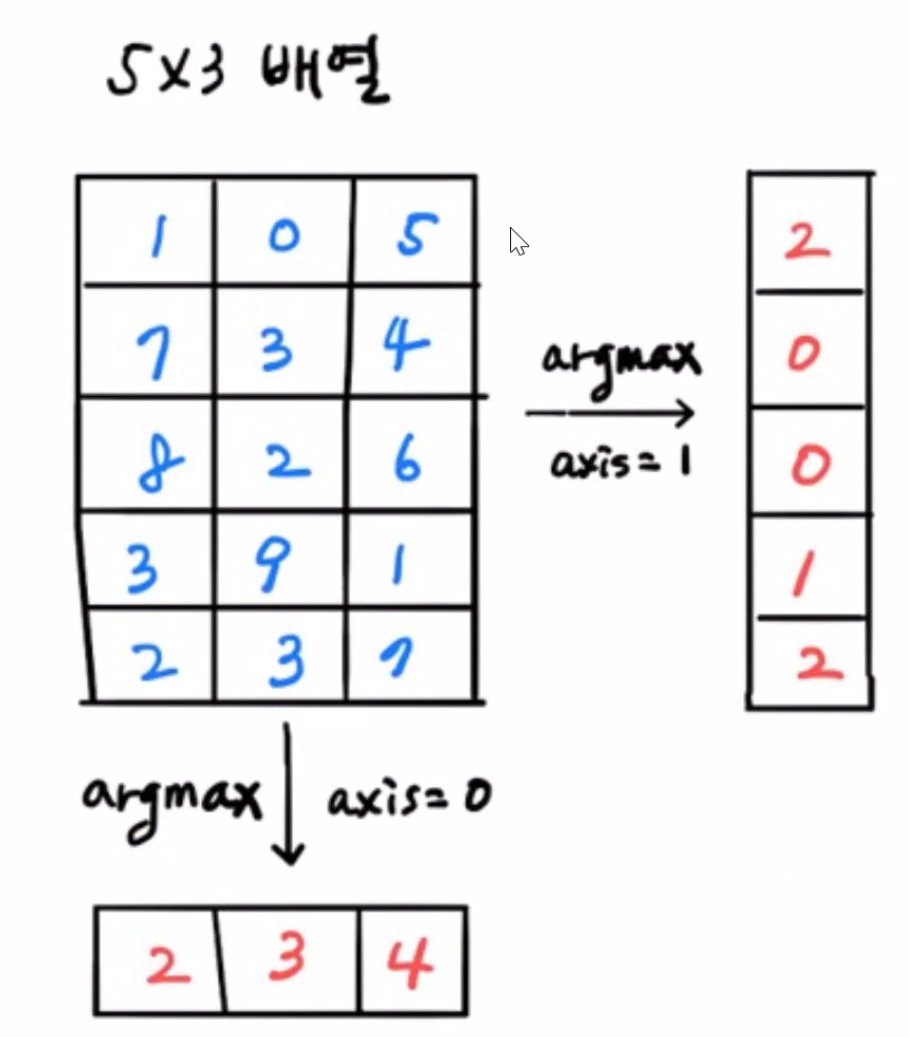

In [49]:
np.round(np.mean(val_pred == val_y),4)

0.8848

#### 모델 전체 파일을 읽은 후 검증 세트의 정확도 출력

- 모델 저장 파일 읽기 : load_model(파일명)
    - load_modle() 함수는 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원
    - evaluate() 메서드 사용 가능

In [71]:
model = models.load_model('./model/model-whole.h5')
model.evaluate(test_input , test_target)

313/313 [==============================] - 1s 2ms/step - loss: 53.3440 - accuracy: 0.8630


[53.34396743774414, 0.8629999756813049]

## 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 도와주는 객체
- 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 종료
- keras.callbacks 패키지에 있는 클래스들
- 생성한 콜백객체들은 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

### ModelCheckpoint 콜백
- 최상의 검증 점수를 만드는 모델 저장 


- keras.callbacks.ModelCheckpoint 클래스
    - 생성자의 인수로 저장할 파일이름 지정
    
    
- 형식 : keras.callbacks.ModelCheckpoint('파일이름', monitor='val_loss', save_weight_only=True)
    - monitor='val_loss' : 검증 손실을 관찰
    - save_weight_only : 
         - True인 경우 모델의 가중치와 절편만 저장
         - False인 경우 전체 모델을 저장

In [75]:
from tensorflow.keras import callbacks

model = model_fn(layers.Dropout(0.3))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

check_cb = callbacks.ModelCheckpoint('./model/best_model.h5')

model.fit(train_X , train_y, epochs=20 , validation_data=(val_X , val_y), callbacks=[check_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5924 - accuracy: 0.7935 - val_loss: 0.4457 - val_accuracy: 0.8403
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8411 - val_loss: 0.4094 - val_accuracy: 0.8495
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8525 - val_loss: 0.3757 - val_accuracy: 0.8616
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3841 - accuracy: 0.8610 - val_loss: 0.3574 - val_accuracy: 0.8684
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3687 - accuracy: 0.8652 - val_loss: 0.3603 - val_accuracy: 0.8668
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3592 - accuracy: 0.8683 - val_loss: 0.3567 - val_accuracy: 0.8674
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3441 - accuracy: 0.8732 - val_loss: 0.3411 - val_accuracy:

####  저장된 최상의 검증 점수를 낸 모델을 다시 읽어 예측하기

In [76]:
model = models.load_model('./model/best_model.h5')
model.evaluate(val_X , val_y)

375/375 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8870


[0.31811898946762085, 0.8870000243186951]

### 조기 종료 콜백 : EarlyStopping

- 과대적합이 되기 전에 훈련을 미지 중지하는 것
    - 검증점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법
- 계산 비용과 시간 절약
- 훈련 에포크 횟수를 제한하는 역할로 과대적합을 예방 -> 규제 방법 중 하나


- 형식 : keras.callbacks.EarlyStopping(monitor='val_loss', patient, restore_best_weights=False)
    - patience : 검증 점수가 향상되지 않더라도 지속할 수 있는 최대 에포크 횟수
    - restore_best_weights : 최상의 모델 가중치를 복원할지 지정
        - True 인 경우 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
        - 기본값은 False

#### EarlyStopping 콜백과 ModelCheckpoint 콜백을 사용한 모델

In [85]:
model = model_fn(layers.Dropout(0.3))


model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

check_cb = callbacks.ModelCheckpoint('./model/best_model.h5')

early_stopcb = callbacks.EarlyStopping(patience=2 , restore_best_weights=True)

hist = model.fit(train_X , train_y, epochs=20 , validation_data=(val_X , val_y), callbacks=[check_cb, early_stopcb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5918 - accuracy: 0.7912 - val_loss: 0.4320 - val_accuracy: 0.8411
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8422 - val_loss: 0.3956 - val_accuracy: 0.8553
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4068 - accuracy: 0.8514 - val_loss: 0.3718 - val_accuracy: 0.8620
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3849 - accuracy: 0.8599 - val_loss: 0.3615 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3658 - accuracy: 0.8653 - val_loss: 0.3562 - val_accuracy: 0.8702
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3572 - accuracy: 0.8702 - val_loss: 0.3392 - val_accuracy: 0.8773
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3448 - accuracy: 0.8725 - val_loss: 0.3545 - val_accuracy:

#### 콜백 객체의 속성 확인

In [87]:
early_stopcb.stopped_epoch

9

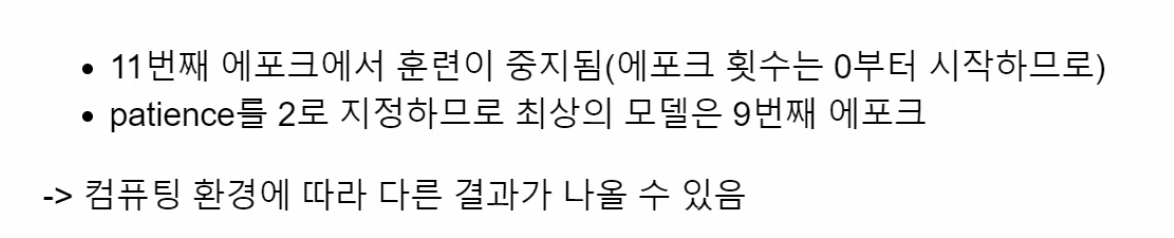

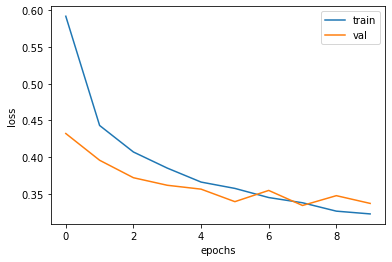

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

# 위에 model 다시 써서 파라미터 초기화 된듯 -> 다시 실행 필요

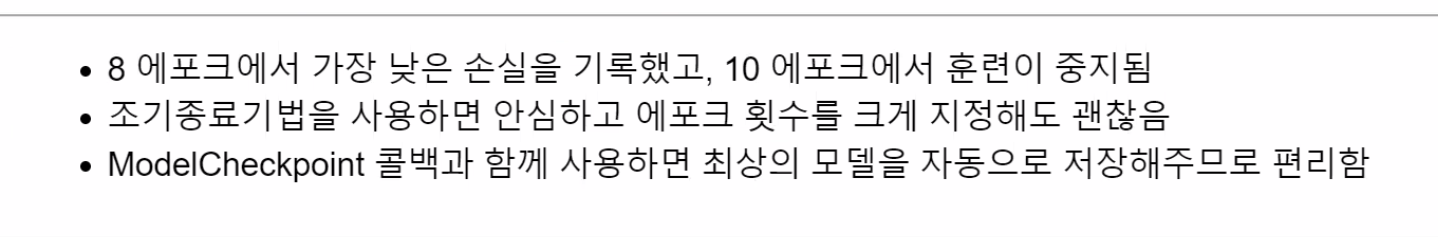

#### 조기 종료로 얻은 모델을 사용하여 검증 세트의 성능 확인

---

### 확인문제

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가?  

    ① model.fit(... , val_input=val_input, val_target=val_target)       
    ② model.fit(... , validation_input=val_input, validation_target=val_target)       
    ③ model.fit(... , val_data=(val_input, val_target))  
    ④ model.fit(... , validation_data=(val_input, val_target))       

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은?

    ① Dropout(0.7)    
    ② Dropout(0.3)  
    ③ Dropout(1/0.7)  
    ④ Dropout(1/0.3)

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가?

    ① save()    
    ② load_model()  
    ③ save_weights()  
    ④ load_weights()      

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가?

    ① EarlyStopping(monitor='loss', patience=3)  
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    ③ EarlyStopping(monitor='accuracy', patience=3)  
    ④ EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)  

### [마무리]

- 드롭아웃(Dropout) 
- 콜백(Callback)
- 조기종료

### [핵심패키지와 함수]

**TensorFlow**

- Dropout : 드롭아웃 층
- save_weights() : 모든 층의 가중치와 절편을 파일에 저장
- load_weights() : save_weights()로 저장된 파일 읽기
- save() : 모델 구조와 모든 가중치와 절편을 파일에 저장
- load_model() : model.save()로 저장된 모델 로드
- ModelCheckpoint : 케라스 모델과 가중치를 일정 간격으로 저장
- EarlyStopping :관심 지표가 더 이상 향상하지 않으면 훈련을 중지

**Numpy**
- agrmax : 배열에서 축을 따라 최대값의 인덱스 반환